In [59]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [60]:
# Generate two-mode distribution
np.random.seed(0)

#2 linear gaussian distributions
data = np.concatenate([np.random.normal(loc=1, scale=2, size=1000),
                       np.random.normal(loc=2, scale=0.5, size=1000)])   

# Define the two-mode distribution as a mixture of two Gaussians
def two_mode_distribution(x):
    return 0.55 * norm.pdf(x, loc=1, scale=2) + 0.45 * norm.pdf(x, loc=2, scale=0.5)

Firstly, we have defined 2 linear gaussian distributions with mean (loc) as 1 and 2 and standard deviation (scale) as 2 and 0.5, respectively.

The two_mode_distribution function uses a linear combination of these two distributions to develop a two mode distribution with their proportions being 0.55 and 0.45 respectively.It takes x as input and returns the probability density at that point according to the two-mode distribution.

The norm.pdf function is used to calculate the probability density at a value x, when the loc and scale have been given.

In [61]:
# Defining the Forward KL-divergence function
def forward_kl(par):
    mu, sigma = par
    a = norm(loc=mu, scale=sigma)
    return np.mean(np.log(a.pdf(data) / two_mode_distribution(data)))

In [62]:
# Defining the Reverse KL-divergence function
def reverse_kl(par):
    mu, sigma = par
    b = norm(loc=mu, scale=sigma)
    return np.mean(np.log(two_mode_distribution(data) / b.pdf(data)))

These two functions define the forward and the reverse kl divergence between the two mode distribution and the normal doistribution.

Par is a tuple representing the values of the mean (mu) and standard deviation (sigma) of the normal distribution

In [63]:
# Initial parameter values for optimization
mu=0
sigma=1
initial_par= [mu, sigma]

In [64]:
# Fit using Forward KL divergence
forward_result = minimize(forward_kl, initial_par, method='Nelder-Mead')
forward_mu, forward_sigma = forward_result.x

# Fit using Reverse KL divergence
reverse_result = minimize(reverse_kl, initial_par, method='Nelder-Mead')
reverse_mu, reverse_sigma = reverse_result.x

print("Forward KL Divergence:")
print("Estimated mean:", forward_mu)
print("Estimated standard deviation:", forward_sigma)
print()
print("Reverse KL Divergence:")
print("Estimated mean:", reverse_mu)
print("Estimated standard deviation:", reverse_sigma)

<ipython-input-61-b4f1c6985384>:5: RuntimeWarning: divide by zero encountered in log
  return np.mean(np.log(a.pdf(data) / two_mode_distribution(data)))


Forward KL Divergence:
Estimated mean: 0.0006093750000000004
Estimated standard deviation: 0.1374999999999975

Reverse KL Divergence:
Estimated mean: 1.4581120498058842
Estimated standard deviation: 1.5383803870375607


To find the values of optimal parameters that minimize the KL divergence,we have used the minimize function (scipy.optimize library) in both forward and reverse kl divergence. Nelder-Mead is a very frequently used optimization algorithm for finding the minimum of a function. 

In [65]:
# Arrays initialized to contain to the values of kl divergence, each value has been set to zero for now and will change as we iterate
forward_kl_divergence = np.zeros(100)
reverse_kl_divergence = np.zeros(100)

# Fitting process
for i in range(100):
    # Calculate the KL divergence between the two-mode distribution and the normal distribution
    # x= range of values for whichthe distribution will be evaluated
    x = np.linspace(-6, 7, 1000)

    # Probability distribution for two mode distribution
    p_true = two_mode_distribution(x)

    # Probability distribution for normal distribution
    p_approx = norm.pdf(x, loc=mu, scale=sigma)

    # Forward and reverse kl divergence
    forward_kl_divergence[i] = np.sum(p_true * np.log(p_true / p_approx))
    reverse_kl_divergence[i] = np.sum(p_approx * np.log(p_approx / p_true))

    mu += 0.02
    sigma += 0.01

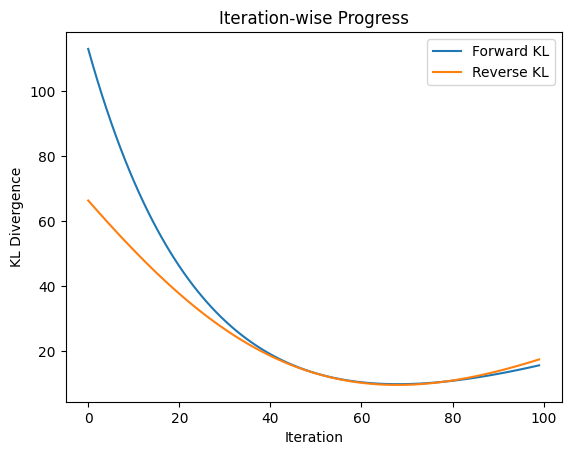

In [66]:
#  iteration-wise progress
plt.plot(range(100), forward_kl_divergence, label='Forward KL')
plt.plot(range(100), reverse_kl_divergence, label='Reverse KL')
plt.xlabel('Iteration')
plt.ylabel('KL Divergence')
plt.title('Iteration-wise Progress')
plt.legend()
plt.show()

1)Forward KL displays the difference between the true distribution and an approximated distribution. It defines the amount of additional information required to represent the true distribution using the approximated distribution. In this, the peaks are overestimated.  
2)Reverse KL displays the difference between the approximated distribution  and the true distribution. It defines the amount of information lost when using approximated distribution to represent the true one. Here the peaks are underestimated.